In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = 
df = pd.read_csv('Data/Airbnb_Milan.csv')

In [10]:
df['host_location'].value_counts()

1    8945
0     377
Name: host_location, dtype: int64

In [11]:
df.groupby('host_location').size()

host_location
0     377
1    8945
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        9322 non-null   int64  
 1   id                                9322 non-null   int64  
 2   host_id                           9322 non-null   int64  
 3   host_location                     9322 non-null   int64  
 4   host_response_time                9322 non-null   int64  
 5   host_response_rate                9322 non-null   int64  
 6   host_is_superhost                 9322 non-null   int64  
 7   host_total_listings_count         9322 non-null   int64  
 8   host_has_profile_pic              9322 non-null   int64  
 9   host_identity_verified            9322 non-null   int64  
 10  neighbourhood_cleansed            9322 non-null   int64  
 11  zipcode                           9322 non-null   int64  
 12  latitu

In [7]:
# we have a single entry for each id.
# Therefore we have a snapshot of the Milan AirBnB situation
# We will not investigate how the prices change over time

df.groupby('id').count().sort_values('host_id', ascending=False)

,Unnamed: 0,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in
id,,,,,,,,,,,,,,,,,,,,,
23986,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
24800992,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
24962104,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
24974396,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
24976566,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13616397,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13626690,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13630726,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [22]:
df['guests_included'].value_counts()

1     4354
2     4095
4      441
3      308
6       53
5       37
8       14
7        6
10       4
17       3
18       3
9        2
16       1
12       1
Name: guests_included, dtype: int64

In [53]:
price_corr = df.corr()
price_corr[['daily_price', 'price_per_tenant']].sort_values('price_per_tenant', ascending=False).head(50)

two_price_corr = price_corr[['daily_price', 'price_per_tenant']]

<AxesSubplot:>

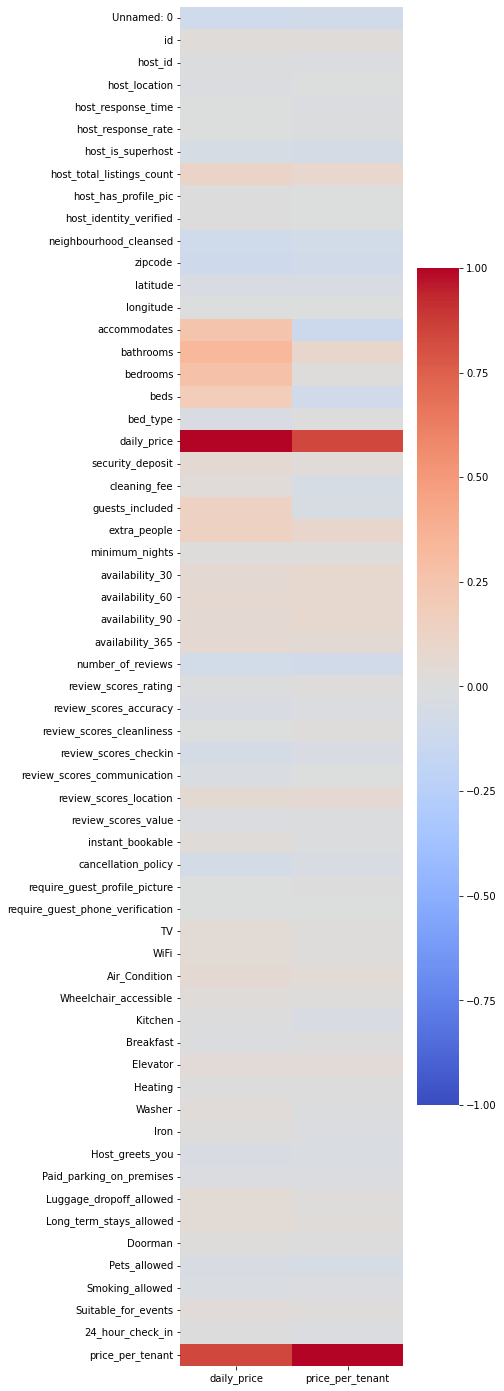

In [56]:
# plot a heatmap with annotation
plt.figure(figsize = (5,25))
# Set the desired color palette
color_palette = "coolwarm"  # Example palette, you can choose any other available palette
# Set the desired range for the color palette
vmin = -1  # Minimum value
vmax = 1   # Maximum value
sns.heatmap(two_price_corr, annot=False, cmap=color_palette, vmin=vmin, vmax=vmax, annot_kws={"size": 7})


In [23]:
df['price_per_tenant'] = df['daily_price'] / df['accommodates']

In [28]:
w_price_corr = df.corr()['price_per_tenant'].sort_values(ascending=False)

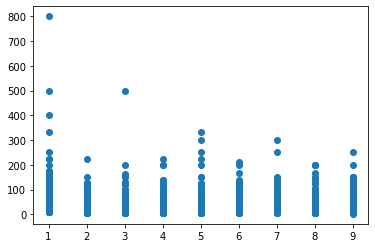

In [73]:

plt.scatter('neighbourhood_cleansed','price_per_tenant', data = df[df['daily_price'] < 2000])

In [76]:
df.groupby('accommodates').mean()[['daily_price', 'price_per_tenant']]

,daily_price,price_per_tenant
accommodates,,
1,61.271429,61.271429
2,80.752391,40.376196
3,81.938361,27.312787
4,103.906963,25.976741
5,117.576923,23.515385
6,168.569678,28.094946
7,170.267176,24.323882
8,277.798165,34.724771
9,246.809524,27.423280


Text(0.5, 1.0, 'Price Comparison by WiFi')

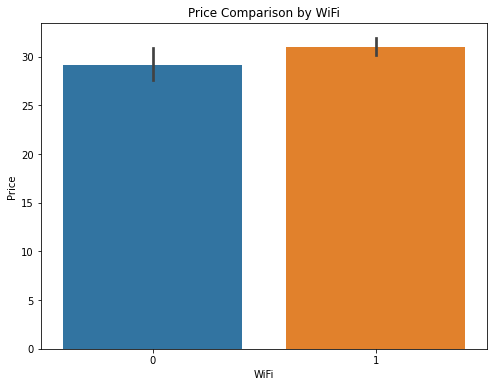

In [79]:
test_column = 'WiFi'
plt.figure(figsize=(8,6))
sns.barplot(x=test_column, y='price_per_tenant', data = df)
plt.xlabel(test_column)
plt.ylabel('Price')
plt.title(f'Price Comparison by {test_column}')

<BarContainer object of 9322 artists>

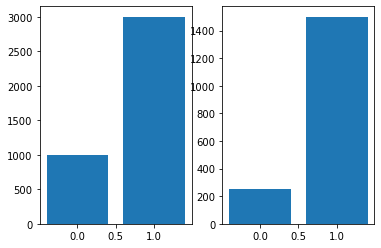

In [84]:
test_column = 'WiFi'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.bar(test_column, 'daily_price', data = df)
ax2.bar(test_column, 'price_per_tenant', data = df)